In [1]:
import numpy as np
import mne 
from matplotlib import pyplot as plt
from pathlib import Path
raw = mne.io.read_raw_edf("./data/chb01_01.edf")


Extracting EDF parameters from c:\Users\user\뇌전증\(20211008)_EDF_analysis_ezcaretech_전용훈\data\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\user\AppData\Local\Temp/ipykernel_46072/1386160575.py:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("./data/chb01_01.edf")


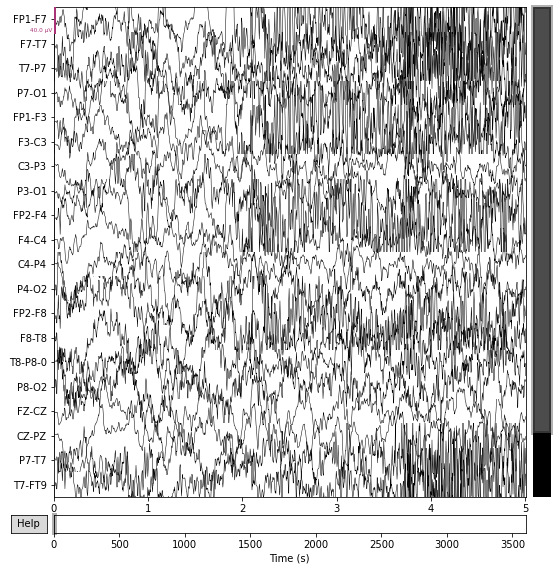

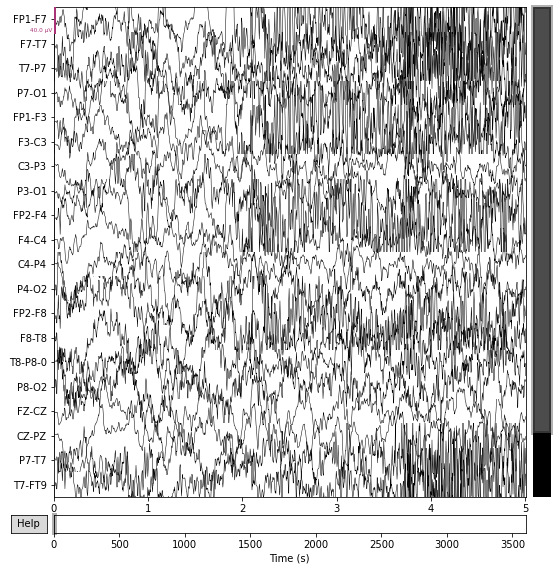

In [3]:
raw.plot(duration=5)

In [4]:
raw_epoch = raw.copy().crop(0,30, include_tmax=False).load_data().notch_filter(freqs=60.0)

Reading 0 ... 7679  =      0.000 ...    29.996 secs...
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 sec)



In [15]:
raw_selection = raw_epoch.get_data()

### Signal 단순화

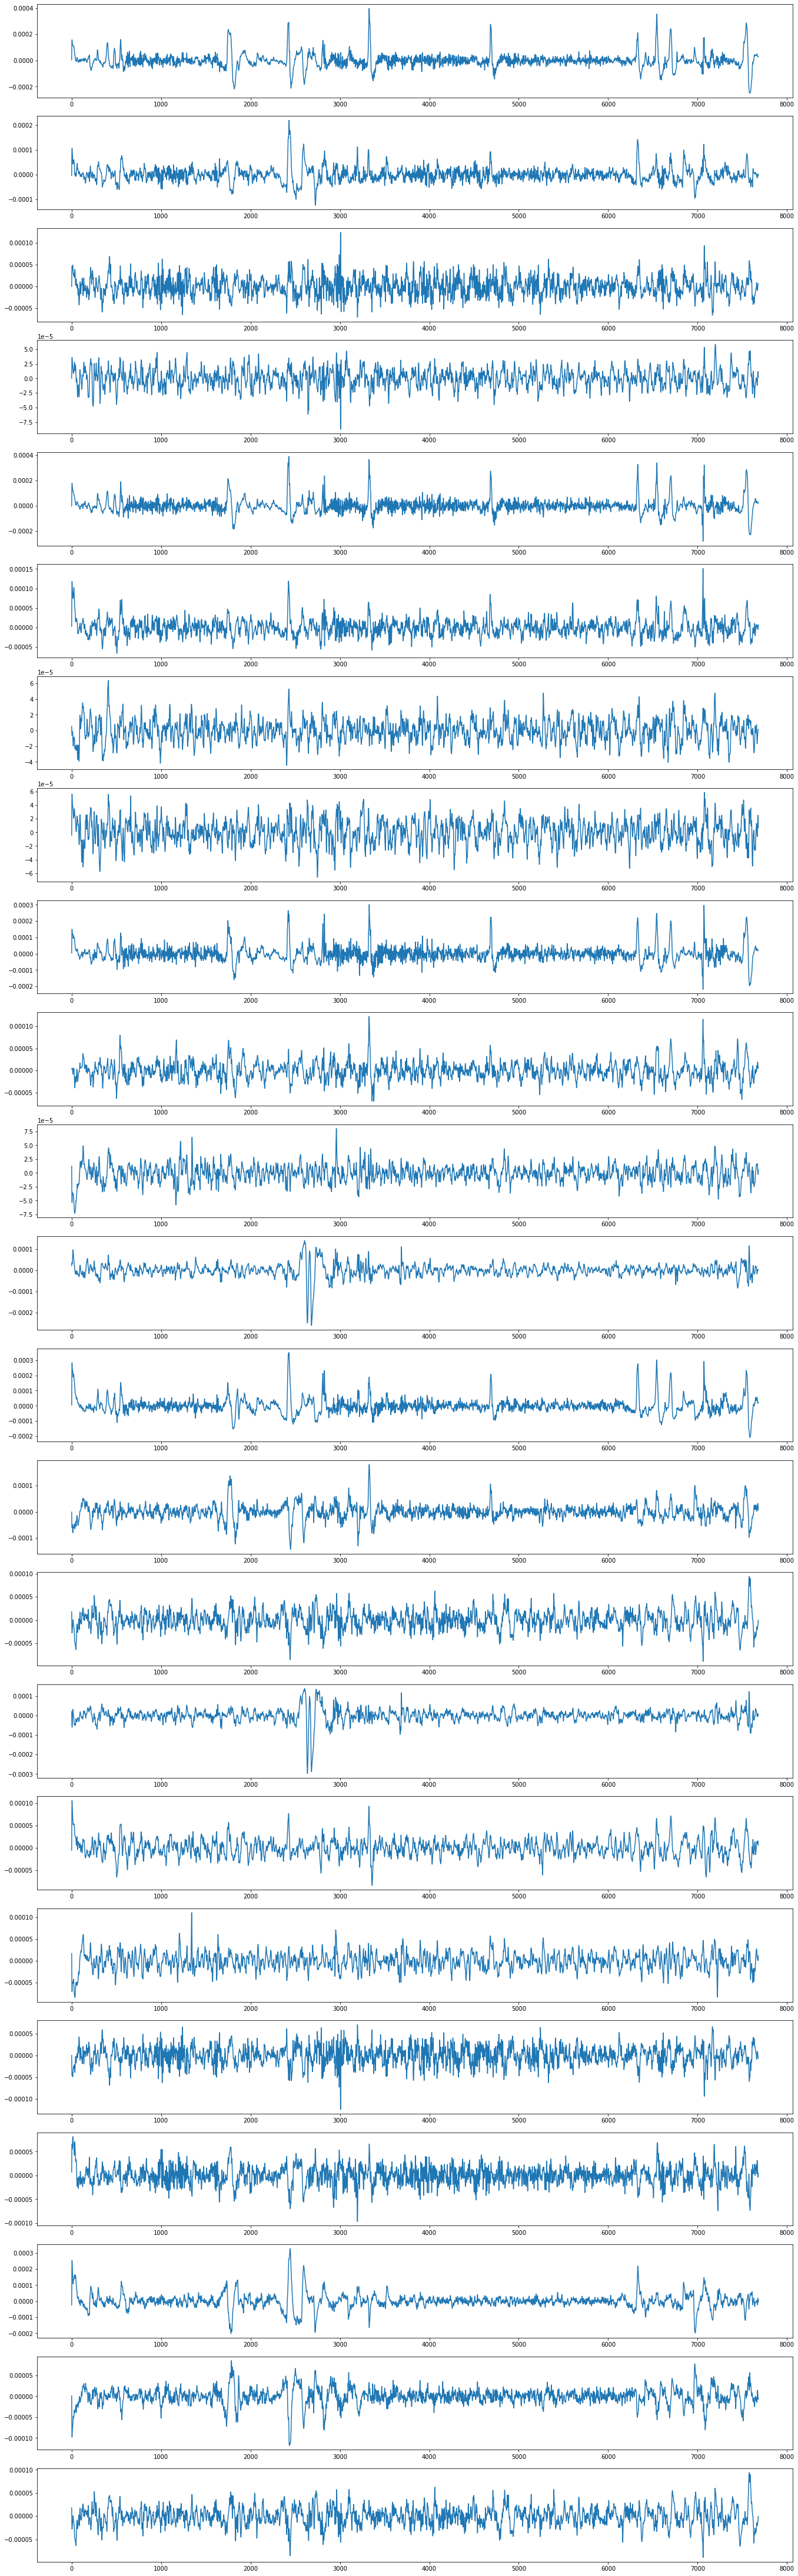

In [17]:
from scipy.signal import butter
from scipy.signal import filtfilt
plt.figure(figsize=(23, 80)) 
for i in range(raw_selection.shape[0]):
    plt.subplot(23,1,i+1)
    x = raw_selection[i]
    fs = raw.info['sfreq']
    lowcut = 1
    highcut = 30
    order = 3
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b,a,x)
    plt.plot(y)

## STFT

In [18]:
from scipy.signal import stft
from sklearn.preprocessing import MinMaxScaler

C:\Users\user\AppData\Local\Temp/ipykernel_46072/1830181114.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  rst = plt.pcolormesh(t, f, Zxx, cmap='jet')
C:\Users\user\AppData\Local\Temp/ipykernel_46072/1830181114.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  rst = plt.pcolormesh(t, f, Zxx, cmap='jet')
C:\Users\user\AppData\Local\Temp/ipykernel_46072/1830181114.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimension

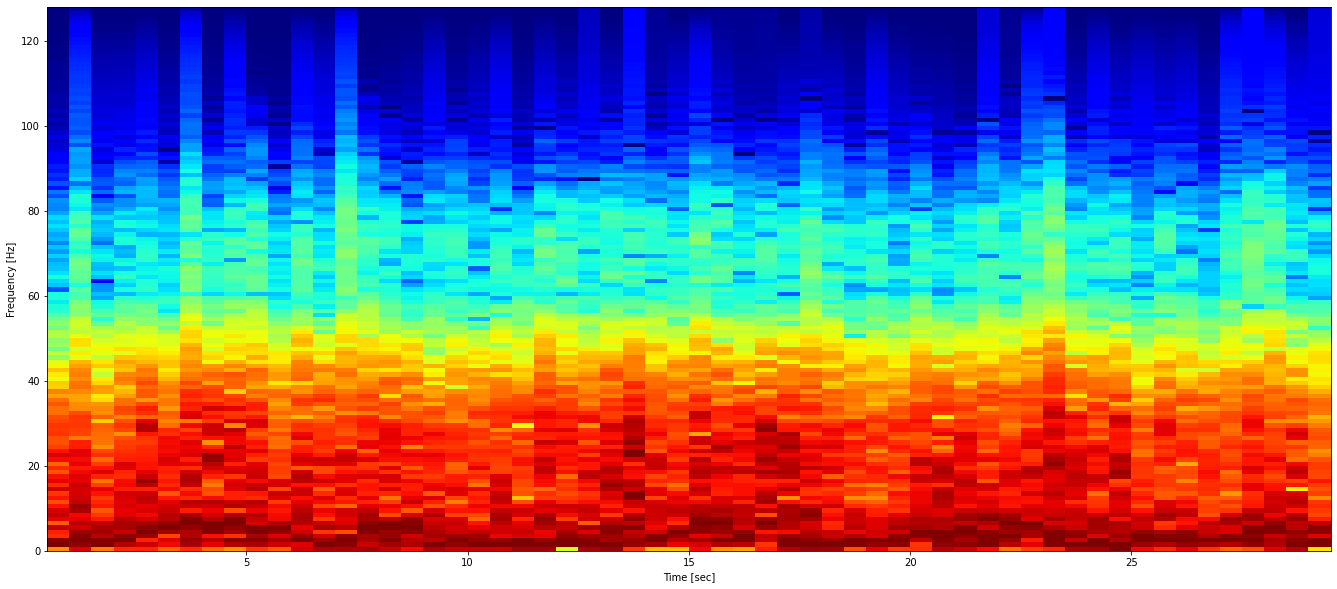

In [22]:
scaler = MinMaxScaler()
plt.figure(figsize=(23, 10)) 
for i in range(raw_selection.shape[0]):
    # plt.subplot(23,1,i+1)
    x = raw_selection[i]
    fs = raw.info['sfreq']
    lowcut = 1
    highcut = 30
    order = 3
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b,a,x)
    f,t, Zxx = stft(y, fs=fs, window='hanning', nperseg =fs, noverlap=(fs//2), boundary=None)
    Zxx = np.abs(Zxx)
    Zxx = scaler.fit_transform(10*np.log10(Zxx))
    rst = plt.pcolormesh(t, f, Zxx, cmap='jet')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.savefig(f"figures/stft_{i}.png")


In [20]:
Path.cwd()

WindowsPath('c:/Users/user/뇌전증/(20211008)_EDF_analysis_ezcaretech_전용훈')

## CWT

In [23]:
from obspy.signal.tf_misfit import cwt

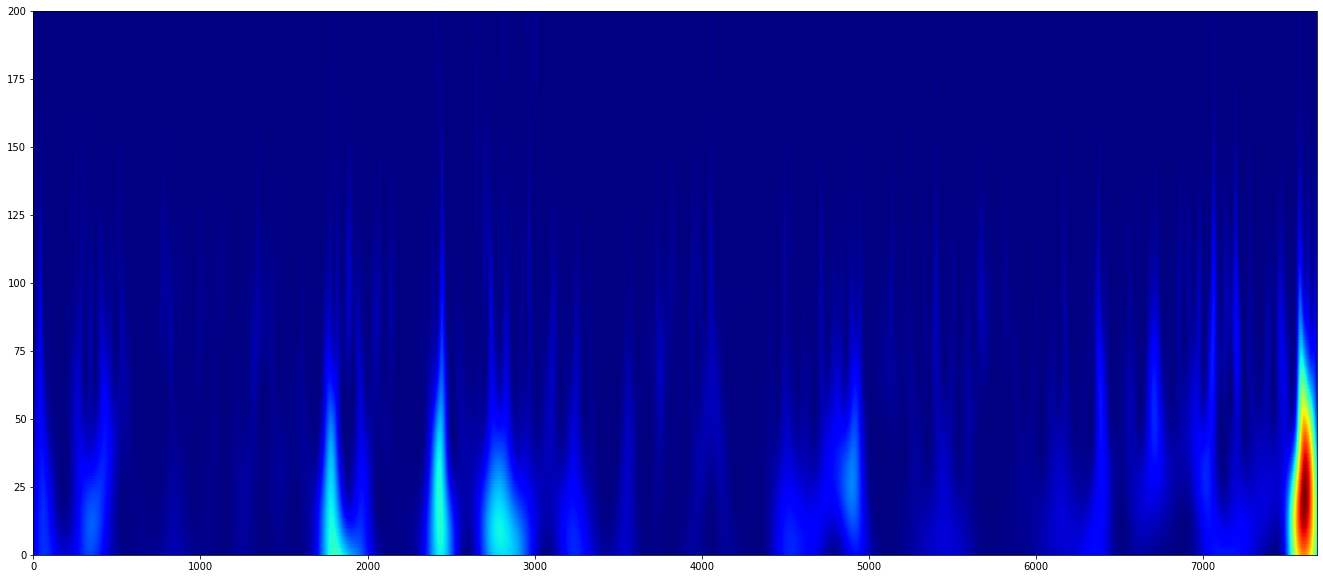

In [25]:
dt = 1/fs
w0 = 2
nf = 200
fmin = lowcut
fmax = highcut

plt.figure(figsize=(23, 10)) 
for i in range(raw_selection.shape[0]):
    # plt.subplot(23,1,i+1)
    x = raw_selection[i]
    scalogram = pow(np.abs(cwt(x,dt,w0,fmin, fmax, nf)),2)
    plt.pcolormesh(scalogram, cmap='jet')
    plt.savefig(f'cwt_figures/cwt_{i}.png')
